Import Necessary Libraries 

In [1]:
import pandas as pd   
import numpy as np 
import seaborn as sns 
import matplotlib.pylab as plt 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)

# Handling Missing Values 
from sklearn.impute import SimpleImputer

# SMOTE 
from imblearn.over_sampling import SMOTE

# Standarlization 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# For pipeline to avoid data leakage 
from imblearn.pipeline import Pipeline as ImbPipeline

# Cross Validation purposes 
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold,
    GridSearchCV

)

# Training Model 
from sklearn.ensemble import RandomForestClassifier

# Evaluator for testing 
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, ConfusionMatrixDisplay

Importing functions that will generate synthetic data 

Student contains name, year, student number.  
GrdSystem contains the individual grades per subject, the calculator for computing grades (Based on student handbook), and the indicator of the student status (Regular or Irregular).    
S_H_Survey will give the answers: 

Homework/Assignments - Do you feel that completing your homework helps you understand the course material better? Yes/No

Time Allocation - Self-reported ratings on ability to manage study time (e.g., poor, fair, good).

Reading and Note-taking - Types of note-taking methods used (e.g., handwritten, digital).

Study Period Procedures - Use of Study Techniques: Frequency of using different study techniques (e.g., summarizing, group discussions, flashcards, pomodoro).

Examination Taking - Average time spent preparing for exams.

Teachers Consultation  - Do you regularly consult with your teachers outside of class? Yes/No 

In [2]:
from stdInfo_Function import Student

student = Student(624)
student_info = student.std_info_dt()
print(student_info)

                    Name  Year Student Number
0         Michael Thomas     1       24427517
1        Michael Mcguire     4       21908695
2         Jonathan Smith     4       21620116
3           Jaime Phelps     2       23128726
4        Nicole Hamilton     3       22926109
..                   ...   ...            ...
619  Hailey Crawford PhD     2       23052132
620        Ryan Randolph     3       22373269
621       Caitlin Torres     2       23560694
622     Yolanda Stephens     1       24256396
623       Kenneth Flores     2       23494422

[624 rows x 3 columns]


In [3]:
from stdGrade_Function import GrdSystem

students = GrdSystem(624)
student_grades = students.overall_dt_stdGrades()
print(student_grades)

                    Name  Year Student Number  Subject_1  Subject_2  \
0         Michael Thomas     1       24427517       1.25       3.00   
1        Michael Mcguire     4       21908695       1.75       2.00   
2         Jonathan Smith     4       21620116       1.00       1.75   
3           Jaime Phelps     2       23128726       1.25       2.50   
4        Nicole Hamilton     3       22926109       1.25       3.00   
..                   ...   ...            ...        ...        ...   
619  Hailey Crawford PhD     2       23052132       2.00       2.25   
620        Ryan Randolph     3       22373269       2.50       4.00   
621       Caitlin Torres     2       23560694       4.00       2.00   
622     Yolanda Stephens     1       24256396       2.50       2.75   
623       Kenneth Flores     2       23494422       1.00       1.00   

     Subject_3  Subject_4  Subject_5     Status  Subject_6  Subject_7  \
0         2.25       1.50       1.00    Regular        NaN        NaN   
1

In [4]:
from StudyHbtsSurvey_Function import S_H_Survey

survey = S_H_Survey(624, total_respondents= 624, respondents_ans=531)
student_survey = survey.std_info_and_survey()
print(student_survey)

                    Name  Year Student Number Homework Time Allocation  \
0         Michael Thomas     1       24427517      Yes            Good   
1        Michael Mcguire     4       21908695       No            Fair   
2         Jonathan Smith     4       21620116      Yes            Fair   
3           Jaime Phelps     2       23128726       No            Fair   
4        Nicole Hamilton     3       22926109       No            Good   
..                   ...   ...            ...      ...             ...   
619  Hailey Crawford PhD     2       23052132     None            None   
620        Ryan Randolph     3       22373269     None            None   
621       Caitlin Torres     2       23560694     None            None   
622     Yolanda Stephens     1       24256396     None            None   
623       Kenneth Flores     2       23494422     None            None   

    Reading and Note Taking Study Period Procedures  Examination  \
0                   Digital       Group Dis

Concatenating Dataframes 

In [5]:
concat_data = pd.merge(student_grades, student_survey, how= "left", on= ["Student Number", "Name", "Year"])
concat_data

,Name,Year,Student Number,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Status,Subject_6,Subject_7,Subject_8,Final Grade,Subjects Failed,Homework,Time Allocation,Reading and Note Taking,Study Period Procedures,Examination,Teachers Consultation
0,Michael Thomas,1,24427517,1.25,3.00,2.25,1.50,1.00,Regular,NaN,NaN,NaN,1.84,0,Yes,Good,Digital,Group Discussions,2.0,Yes
1,Michael Mcguire,4,21908695,1.75,2.00,2.75,3.00,1.50,Regular,NaN,NaN,NaN,2.20,0,No,Fair,Handwritten,Summarizing,7.0,No
2,Jonathan Smith,4,21620116,1.00,1.75,2.50,1.75,2.00,Regular,NaN,NaN,NaN,1.80,0,Yes,Fair,Handwritten,Pomodoro,19.0,Yes
3,Jaime Phelps,2,23128726,1.25,2.50,4.00,5.00,1.00,Irregular,2.75,2.25,1.00,2.52,2,No,Fair,Handwritten,Summarizing,17.0,Yes
4,Nicole Hamilton,3,22926109,1.25,3.00,4.00,1.25,2.00,Irregular,4.00,2.25,NaN,2.54,2,No,Good,Digital,Summarizing,13.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Hailey Crawford PhD,2,23052132,2.00,2.25,1.50,3.00,2.25,Regular,1.50,2.25,1.00,1.97,0,None,None,None,None,NaN,None
620,Ryan Randolph,3,22373269,2.50,4.00,1.50,1.50,3.00,Irregular,1.00,2.75,NaN,2.32,1,None,None,None,None,NaN,None
621,Caitlin Torres,2,23560694,4.00,2.00,5.00,2.25,1.75,Irregular,4.00,1.50,5.00,3.15,4,None,None,None,None,NaN,None
622,Yolanda Stephens,1,24256396,2.50,2.75,1.25,5.00,5.00,Irregular,NaN,NaN,NaN,3.36,2,None,None,None,None,NaN,None


Understanding dataframes 

In [6]:
concat_data.shape

(624, 20)

In [ ]:
concat_data.dtypes

Name                        object
Year                         int64
Student Number              object
Subject_1                  float64
Subject_2                  float64
Subject_3                  float64
Subject_4                  float64
Subject_5                  float64
Status                      object
Subject_6                  float64
Subject_7                  float64
Subject_8                  float64
Final Grade                float64
Subjects Failed              int64
Homework                    object
Time Allocation             object
Reading and Note Taking     object
Study Period Procedures     object
Examination                float64
Teachers Consultation       object
dtype: object

In [8]:
concat_data.describe()

,Year,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Final Grade,Subjects Failed,Examination
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,308.000000,308.000000,144.000000,624.000000,624.000000,531.000000
mean,2.597756,2.497596,2.430288,2.480369,2.532452,2.479567,2.504058,2.383929,2.421875,2.478317,1.141026,10.932203
std,1.120391,1.166597,1.123471,1.163981,1.169798,1.122727,1.166592,1.122995,1.237338,0.460393,0.954494,5.704940
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.350000,0.000000,1.000000
25%,2.000000,1.500000,1.500000,1.500000,1.750000,1.500000,1.500000,1.500000,1.500000,2.120000,0.000000,6.000000
50%,3.000000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.450000,1.000000,11.000000
75%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.750000,3.000000,2.800000,2.000000,16.000000
max,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.020000,5.000000,20.000000


Cleaning the Data

In [9]:
#Checking Duplicates 

concat_data.duplicated().sum()

np.int64(0)

In [10]:
#Checking null values 

concat_data.isnull().sum()

Name                         0
Year                         0
Student Number               0
Subject_1                    0
Subject_2                    0
Subject_3                    0
Subject_4                    0
Subject_5                    0
Status                       0
Subject_6                  316
Subject_7                  316
Subject_8                  480
Final Grade                  0
Subjects Failed              0
Homework                    93
Time Allocation             93
Reading and Note Taking     93
Study Period Procedures     93
Examination                 93
Teachers Consultation       93
dtype: int64

In [11]:
#Dropping unnecessary columns 

concat_data.columns 

Index(['Name', 'Year', 'Student Number', 'Subject_1', 'Subject_2', 'Subject_3',
       'Subject_4', 'Subject_5', 'Status', 'Subject_6', 'Subject_7',
       'Subject_8', 'Final Grade', 'Subjects Failed', 'Homework',
       'Time Allocation', 'Reading and Note Taking', 'Study Period Procedures',
       'Examination', 'Teachers Consultation'],
      dtype='object')

In [12]:
concat_data = concat_data[[
    #    'Name', 
        'Year', 
    #    'Student Number', 
    #    'Subject_1', 'Subject_2', 'Subject_3',
    #    'Subject_4', 'Subject_5', 'Status', 'Subject_6', 'Subject_7',
    #    'Subject_8', 
       'Final Grade', 'Subjects Failed', 'Homework',
       'Time Allocation', 'Reading and Note Taking', 'Study Period Procedures',
       'Examination', 'Teachers Consultation', 'Status']].copy()

concat_data.head()

,Year,Final Grade,Subjects Failed,Homework,Time Allocation,Reading and Note Taking,Study Period Procedures,Examination,Teachers Consultation,Status
0,1,1.84,0,Yes,Good,Digital,Group Discussions,2.0,Yes,Regular
1,4,2.20,0,No,Fair,Handwritten,Summarizing,7.0,No,Regular
2,4,1.80,0,Yes,Fair,Handwritten,Pomodoro,19.0,Yes,Regular
3,2,2.52,2,No,Fair,Handwritten,Summarizing,17.0,Yes,Irregular
4,3,2.54,2,No,Good,Digital,Summarizing,13.0,Yes,Irregular


In [13]:
# Renaming Columns 

concat_data = concat_data.rename(columns = { 
    "Final Grade" : "Final_Grade",
    "Subjects Failed" : "Subjects_Failed",
    "Time Allocation" : "Time_Allocation",
    "Reading and Note Taking" : "Reading_and_Note_Taking",
    "Study Period Procedures" : "Study_Period_Procedures",
    "Teachers Consultation": "Teachers_Consultation",
})

concat_data.head()

,Year,Final_Grade,Subjects_Failed,Homework,Time_Allocation,Reading_and_Note_Taking,Study_Period_Procedures,Examination,Teachers_Consultation,Status
0,1,1.84,0,Yes,Good,Digital,Group Discussions,2.0,Yes,Regular
1,4,2.20,0,No,Fair,Handwritten,Summarizing,7.0,No,Regular
2,4,1.80,0,Yes,Fair,Handwritten,Pomodoro,19.0,Yes,Regular
3,2,2.52,2,No,Fair,Handwritten,Summarizing,17.0,Yes,Irregular
4,3,2.54,2,No,Good,Digital,Summarizing,13.0,Yes,Irregular


In [14]:
#Converting dtypes float to int 

concat_data['Final_Grade'] = pd.to_numeric(concat_data['Final_Grade'], errors='coerce')

concat_data.dtypes

Year                         int64
Final_Grade                float64
Subjects_Failed              int64
Homework                    object
Time_Allocation             object
Reading_and_Note_Taking     object
Study_Period_Procedures     object
Examination                float64
Teachers_Consultation       object
Status                      object
dtype: object

Handling Missing Values 

In [15]:
concat_data.isnull().sum()

Year                        0
Final_Grade                 0
Subjects_Failed             0
Homework                   93
Time_Allocation            93
Reading_and_Note_Taking    93
Study_Period_Procedures    93
Examination                93
Teachers_Consultation      93
Status                      0
dtype: int64

<Axes: >

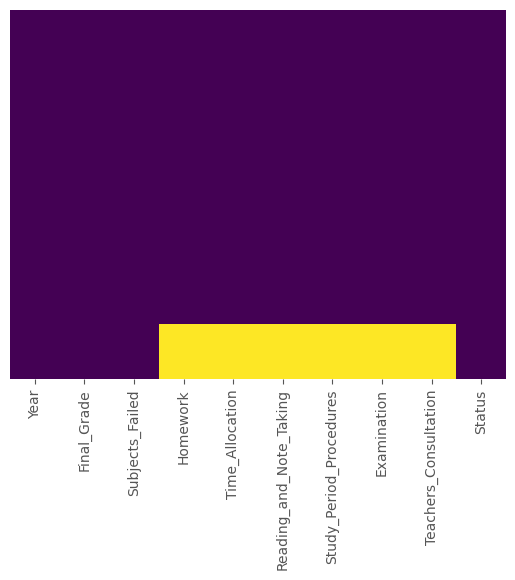

In [16]:
sns.heatmap(concat_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='Status', ylabel='count'>

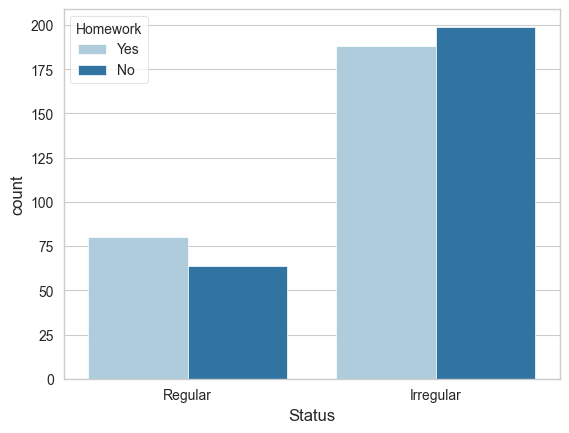

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Status', hue='Homework', data=concat_data, palette='Paired')

<Axes: xlabel='Status', ylabel='count'>

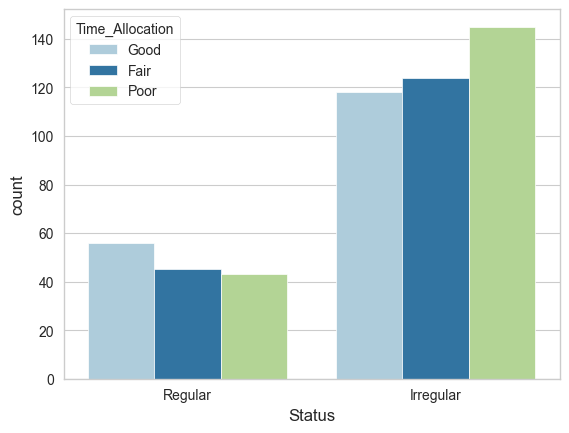

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Status', hue='Time_Allocation', data=concat_data, palette='Paired')

<Axes: xlabel='Status', ylabel='count'>

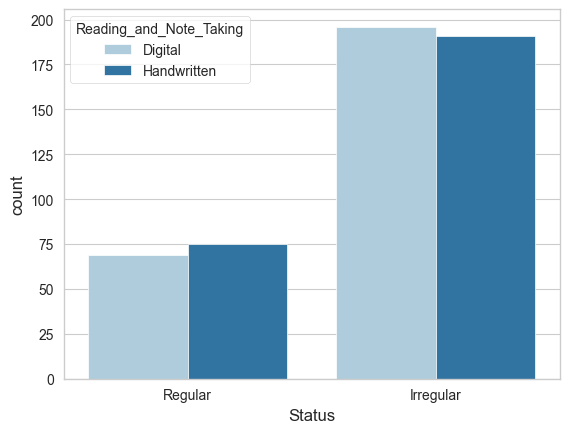

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Status', hue='Reading_and_Note_Taking', data=concat_data, palette='Paired')

<Axes: xlabel='Status', ylabel='count'>

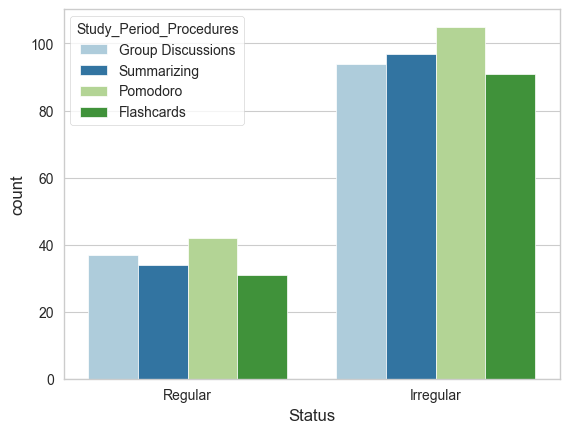

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Status', hue='Study_Period_Procedures', data=concat_data, palette='Paired')

<Axes: xlabel='Status', ylabel='count'>

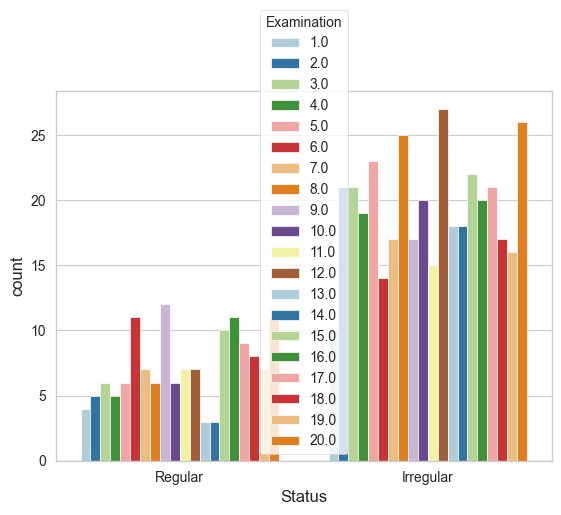

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Status', hue='Examination', data=concat_data, palette='Paired')

<Axes: xlabel='Status', ylabel='count'>

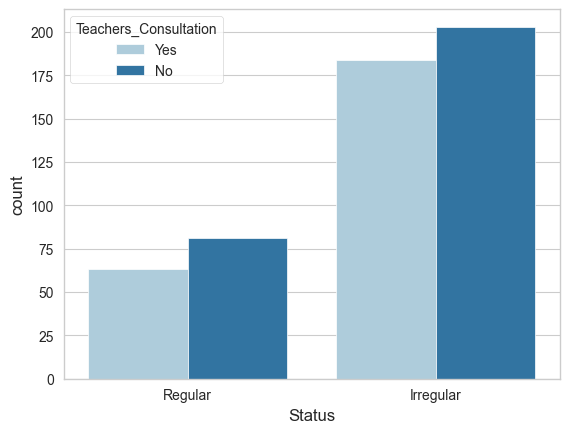

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Status', hue='Teachers_Consultation', data=concat_data, palette='Paired')

In [23]:
import random

homework_counts = concat_data['Homework'].dropna().value_counts(normalize=True)

# Fill missing values in 'Homework' based on the distribution of existing values
concat_data['Homework'] = concat_data['Homework'].apply(
    lambda x: random.choices(homework_counts.index, 
                             weights=homework_counts, 
                             k=1)[0] if pd.isnull(x) else x
)

In [24]:
Time_Allocation_counts = concat_data['Time_Allocation'].dropna().value_counts(normalize=True)

# Fill missing values in 'Time_Allocation' based on the distribution of existing values
concat_data['Time_Allocation'] = concat_data['Time_Allocation'].apply(
    lambda x: random.choices(Time_Allocation_counts.index, 
                             weights=Time_Allocation_counts, 
                             k=1)[0] if pd.isnull(x) else x
)

In [25]:
Reading_and_Note_Taking_counts = concat_data['Reading_and_Note_Taking'].dropna().value_counts(normalize=True)

# Fill missing values in 'Reading_and_Note_Taking' based on the distribution of existing values
concat_data['Reading_and_Note_Taking'] = concat_data['Reading_and_Note_Taking'].apply(
    lambda x: random.choices(Reading_and_Note_Taking_counts.index, 
                             weights=Reading_and_Note_Taking_counts, 
                             k=1)[0] if pd.isnull(x) else x
)


In [26]:
Study_Period_Procedures_counts = concat_data['Study_Period_Procedures'].dropna().value_counts(normalize=True)

# Fill missing values in 'Study_Period_Procedures' based on the distribution of existing values
concat_data['Study_Period_Procedures'] = concat_data['Study_Period_Procedures'].apply(
    lambda x: random.choices(Study_Period_Procedures_counts.index, 
                             weights=Study_Period_Procedures_counts, 
                             k=1)[0] if pd.isnull(x) else x
)


In [27]:
Examination_counts = concat_data['Examination'].dropna().value_counts(normalize=True)

# Fill missing values in 'Examination' based on the distribution of existing values
concat_data['Examination'] = concat_data['Examination'].apply(
    lambda x: random.choices(Examination_counts.index, 
                             weights=Examination_counts, 
                             k=1)[0] if pd.isnull(x) else x
)


In [28]:
Teachers_Consultation_counts = concat_data['Teachers_Consultation'].dropna().value_counts(normalize=True)

# Fill missing values in 'Teachers_Consultation' based on the distribution of existing values
concat_data['Teachers_Consultation'] = concat_data['Teachers_Consultation'].apply(
    lambda x: random.choices(Teachers_Consultation_counts.index, 
                             weights=Teachers_Consultation_counts, 
                             k=1)[0] if pd.isnull(x) else x
)


In [29]:
concat_data

,Year,Final_Grade,Subjects_Failed,Homework,Time_Allocation,Reading_and_Note_Taking,Study_Period_Procedures,Examination,Teachers_Consultation,Status
0,1,1.84,0,Yes,Good,Digital,Group Discussions,2.0,Yes,Regular
1,4,2.20,0,No,Fair,Handwritten,Summarizing,7.0,No,Regular
2,4,1.80,0,Yes,Fair,Handwritten,Pomodoro,19.0,Yes,Regular
3,2,2.52,2,No,Fair,Handwritten,Summarizing,17.0,Yes,Irregular
4,3,2.54,2,No,Good,Digital,Summarizing,13.0,Yes,Irregular
...,...,...,...,...,...,...,...,...,...,...
619,2,1.97,0,No,Fair,Digital,Pomodoro,6.0,Yes,Regular
620,3,2.32,1,No,Good,Handwritten,Summarizing,7.0,Yes,Irregular
621,2,3.15,4,No,Poor,Handwritten,Summarizing,12.0,No,Irregular
622,1,3.36,2,Yes,Fair,Handwritten,Flashcards,17.0,No,Irregular


In [30]:
concat_data.isnull().sum()

Year                       0
Final_Grade                0
Subjects_Failed            0
Homework                   0
Time_Allocation            0
Reading_and_Note_Taking    0
Study_Period_Procedures    0
Examination                0
Teachers_Consultation      0
Status                     0
dtype: int64

Some data are in object, we need to convert it to numerical for better understading 

In [31]:
# Converting using pd.dummies

features_dummies = pd.get_dummies(concat_data[['Time_Allocation','Study_Period_Procedures']])

features_dummies = features_dummies.astype(int)

features_dummies


,Time_Allocation_Fair,Time_Allocation_Good,Time_Allocation_Poor,Study_Period_Procedures_Flashcards,Study_Period_Procedures_Group Discussions,Study_Period_Procedures_Pomodoro,Study_Period_Procedures_Summarizing
0,0,1,0,0,1,0,0
1,1,0,0,0,0,0,1
2,1,0,0,0,0,1,0
3,1,0,0,0,0,0,1
4,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...
619,1,0,0,0,0,1,0
620,0,1,0,0,0,0,1
621,0,0,1,0,0,0,1
622,1,0,0,1,0,0,0


In [ ]:
# Converting using labelencoder 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

concat_data['Homework'] = label_encoder.fit_transform(concat_data['Homework'])
concat_data['Reading_and_Note_Taking'] = label_encoder.fit_transform(concat_data['Reading_and_Note_Taking'])
concat_data['Teachers_Consultation'] = label_encoder.fit_transform(concat_data['Teachers_Consultation'])
concat_data['Status'] = label_encoder.fit_transform(concat_data['Status'])

concat_data

,Year,Final_Grade,Subjects_Failed,Homework,Time_Allocation,Reading_and_Note_Taking,Study_Period_Procedures,Examination,Teachers_Consultation,Status
0,1,1.84,0,1,Good,0,Group Discussions,2.0,1,1
1,4,2.20,0,0,Fair,1,Summarizing,7.0,0,1
2,4,1.80,0,1,Fair,1,Pomodoro,19.0,1,1
3,2,2.52,2,0,Fair,1,Summarizing,17.0,1,0
4,3,2.54,2,0,Good,0,Summarizing,13.0,1,0
...,...,...,...,...,...,...,...,...,...,...
619,2,1.97,0,0,Fair,0,Pomodoro,6.0,1,1
620,3,2.32,1,0,Good,1,Summarizing,7.0,1,0
621,2,3.15,4,0,Poor,1,Summarizing,12.0,0,0
622,1,3.36,2,1,Fair,1,Flashcards,17.0,0,0


In [33]:
# Concatenate the dummies with the original data
concat_data_updated = pd.concat([concat_data, features_dummies], axis=1)

# Drop the original columns 
concat_data_updated = concat_data_updated.drop(['Time_Allocation', 'Study_Period_Procedures'], axis=1)

concat_data_updated.head()

,Year,Final_Grade,Subjects_Failed,Homework,Reading_and_Note_Taking,Examination,Teachers_Consultation,Status,Time_Allocation_Fair,Time_Allocation_Good,Time_Allocation_Poor,Study_Period_Procedures_Flashcards,Study_Period_Procedures_Group Discussions,Study_Period_Procedures_Pomodoro,Study_Period_Procedures_Summarizing
0,1,1.84,0,1,0,2.0,1,1,0,1,0,0,1,0,0
1,4,2.20,0,0,1,7.0,0,1,1,0,0,0,0,0,1
2,4,1.80,0,1,1,19.0,1,1,1,0,0,0,0,1,0
3,2,2.52,2,0,1,17.0,1,0,1,0,0,0,0,0,1
4,3,2.54,2,0,0,13.0,1,0,0,1,0,0,0,0,1


In [34]:
concat_data_updated.columns

Index(['Year', 'Final_Grade', 'Subjects_Failed', 'Homework',
       'Reading_and_Note_Taking', 'Examination', 'Teachers_Consultation',
       'Status', 'Time_Allocation_Fair', 'Time_Allocation_Good',
       'Time_Allocation_Poor', 'Study_Period_Procedures_Flashcards',
       'Study_Period_Procedures_Group Discussions',
       'Study_Period_Procedures_Pomodoro',
       'Study_Period_Procedures_Summarizing'],
      dtype='object')

In [35]:
concat_data_updated = concat_data_updated[['Year', 'Final_Grade', 'Subjects_Failed', 'Homework',
       'Reading_and_Note_Taking', 'Examination', 'Teachers_Consultation',
        'Time_Allocation_Fair', 'Time_Allocation_Good',
       'Time_Allocation_Poor', 'Study_Period_Procedures_Flashcards',
       'Study_Period_Procedures_Group Discussions',
       'Study_Period_Procedures_Pomodoro',
       'Study_Period_Procedures_Summarizing','Status']]

concat_data_updated

,Year,Final_Grade,Subjects_Failed,Homework,Reading_and_Note_Taking,Examination,Teachers_Consultation,Time_Allocation_Fair,Time_Allocation_Good,Time_Allocation_Poor,Study_Period_Procedures_Flashcards,Study_Period_Procedures_Group Discussions,Study_Period_Procedures_Pomodoro,Study_Period_Procedures_Summarizing,Status
0,1,1.84,0,1,0,2.0,1,0,1,0,0,1,0,0,1
1,4,2.20,0,0,1,7.0,0,1,0,0,0,0,0,1,1
2,4,1.80,0,1,1,19.0,1,1,0,0,0,0,1,0,1
3,2,2.52,2,0,1,17.0,1,1,0,0,0,0,0,1,0
4,3,2.54,2,0,0,13.0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,2,1.97,0,0,0,6.0,1,1,0,0,0,0,1,0,1
620,3,2.32,1,0,1,7.0,1,0,1,0,0,0,0,1,0
621,2,3.15,4,0,1,12.0,0,0,0,1,0,0,0,1,0
622,1,3.36,2,1,1,17.0,0,1,0,0,1,0,0,0,0


In [36]:
concat_data_updated.dtypes

Year                                           int64
Final_Grade                                  float64
Subjects_Failed                                int64
Homework                                       int64
Reading_and_Note_Taking                        int64
Examination                                  float64
Teachers_Consultation                          int64
Time_Allocation_Fair                           int64
Time_Allocation_Good                           int64
Time_Allocation_Poor                           int64
Study_Period_Procedures_Flashcards             int64
Study_Period_Procedures_Group Discussions      int64
Study_Period_Procedures_Pomodoro               int64
Study_Period_Procedures_Summarizing            int64
Status                                         int64
dtype: object

GANS

In [37]:
import ctgan.synthesizers.ctgan as ctgan_mod
print(dir(ctgan_mod))

['BaseSynthesizer', 'BatchNorm1d', 'CTGAN', 'DataSampler', 'DataTransformer', 'Discriminator', 'Dropout', 'Generator', 'LeakyReLU', 'Linear', 'Module', 'ReLU', 'Residual', 'Sequential', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'functional', 'np', 'optim', 'pd', 'random_state', 'torch', 'tqdm', 'warnings']


In [38]:
from ctgan import CTGAN

ctgan = CTGAN(
    generator_dim=(512, 512, 256),
    discriminator_dim=(512, 256, 128),
    epochs=3000,
    batch_size=32,
    verbose=True,
    pac=4,
)




In [39]:
# Preprocessing Continuous Features
from scipy.stats import skew

scaler = MinMaxScaler(feature_range=(0, 1))
continuous_features = ['Final_Grade', 'Subjects_Failed', 'Examination']

for col in continuous_features:
    if skew(concat_data_updated[col]) > 1:  # Log-transform skewed features
        concat_data_updated[col] = np.log1p(concat_data_updated[col])

concat_data_updated[continuous_features] = scaler.fit_transform(concat_data_updated[continuous_features])

print(concat_data_updated[continuous_features].describe())

       Final_Grade  Subjects_Failed  Examination
count   624.000000       624.000000   624.000000
mean      0.422591         0.228205     0.526991
std       0.172432         0.190899     0.301409
min       0.000000         0.000000     0.000000
25%       0.288390         0.000000     0.263158
50%       0.411985         0.200000     0.526316
75%       0.543071         0.400000     0.789474
max       1.000000         1.000000     1.000000


In [40]:
concat_data_updated['Final_Grade_Binned'] = pd.cut(
    concat_data_updated['Final_Grade'],
    bins=[0, 0.5, 0.7, 1.0], 
    labels=['Low', 'Medium', 'High']
)

concat_data_updated['Subjects_Failed_Binned'] = pd.cut(
    concat_data_updated['Subjects_Failed'],
    bins=[-1, 0.2, 0.5, 1.0], 
    labels=['None', 'Few', 'Many']
)

In [41]:
status_counts = concat_data_updated['Status'].value_counts()

n_irregular = status_counts[0]
n_regular = status_counts[1]

print(f"Regular Students: {n_regular}, Irregular Students: {n_irregular}")


Regular Students: 169, Irregular Students: 455


In [42]:
# Train the CTGAN Model

discrete_columns = ['Status', 'Time_Allocation_Fair', 'Time_Allocation_Good', 'Time_Allocation_Poor',
                    'Study_Period_Procedures_Flashcards', 'Study_Period_Procedures_Group Discussions',
                    'Study_Period_Procedures_Pomodoro', 'Study_Period_Procedures_Summarizing', 'Final_Grade_Binned',
                    'Subjects_Failed_Binned']

ctgan.fit(concat_data_updated, discrete_columns=discrete_columns)

Gen. (0.06) | Discrim. (-0.57): 100%|██████████| 3000/3000 [27:00<00:00,  1.85it/s]  


In [43]:
# Generate Synthetic Data
synthetic_data = ctgan.sample(n=1248)

In [44]:
# Post-processing: Fix extreme values for "Examination"
synthetic_data['Examination'] = synthetic_data['Examination'].clip(
    lower=concat_data_updated['Examination'].min(),
    upper=concat_data_updated['Examination'].max()
)

# Additional post-processing (if needed)
for column in continuous_features:  # Adjust distributions
    synthetic_data[column] = synthetic_data[column].clip(
        lower=concat_data_updated[column].min(),
        upper=concat_data_updated[column].max()
    )

# Validate synthetic data
synthetic_data.describe()

,Year,Final_Grade,Subjects_Failed,Homework,Reading_and_Note_Taking,Examination,Teachers_Consultation,Time_Allocation_Fair,Time_Allocation_Good,Time_Allocation_Poor,Study_Period_Procedures_Flashcards,Study_Period_Procedures_Group Discussions,Study_Period_Procedures_Pomodoro,Study_Period_Procedures_Summarizing,Status
count,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000
mean,2.778846,0.448534,0.242725,0.661058,0.512821,0.565802,0.362179,0.321314,0.318910,0.354167,0.234776,0.226763,0.278045,0.240385,0.264423
std,1.056906,0.207281,0.196717,0.473540,0.500036,0.278671,0.480823,0.467168,0.466241,0.478452,0.424028,0.418906,0.448215,0.427488,0.441202
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.288450,0.006351,0.000000,0.000000,0.352803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.442398,0.200580,1.000000,1.000000,0.600611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,0.595125,0.400426,1.000000,1.000000,0.792005,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,4.000000,1.000000,0.684242,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
# Drop Binned Columns
binned_columns = ['Final_Grade_Binned', 'Subjects_Failed_Binned']

synthetic_data.drop(columns=binned_columns, inplace=True)

synthetic_data

,Year,Final_Grade,Subjects_Failed,Homework,Reading_and_Note_Taking,Examination,Teachers_Consultation,Time_Allocation_Fair,Time_Allocation_Good,Time_Allocation_Poor,Study_Period_Procedures_Flashcards,Study_Period_Procedures_Group Discussions,Study_Period_Procedures_Pomodoro,Study_Period_Procedures_Summarizing,Status
0,3,0.545865,0.203172,1,0,0.950570,0,0,0,1,0,1,0,0,0
1,4,0.766803,0.399126,1,1,0.422372,0,0,1,0,0,0,1,0,0
2,3,0.618499,0.200829,1,1,0.338777,0,0,0,1,0,1,0,0,0
3,4,0.437487,0.198260,0,0,1.000000,0,0,1,0,0,0,1,0,0
4,2,0.334558,0.197186,1,1,0.316840,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,2,0.483683,0.631212,0,1,0.735609,1,0,0,1,0,0,0,1,0
1244,2,0.729955,0.408118,1,1,0.123697,0,0,0,1,0,0,0,1,0
1245,2,0.417016,0.397980,0,0,0.232979,0,1,0,0,1,0,0,0,0
1246,3,0.463430,0.203208,0,0,0.145769,1,1,0,0,0,0,0,1,0


C:\Users\ChiliCheeze\AppData\Local\Temp\ipykernel_4128\291449245.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(concat_data_updated[col], label='Original', shade=True)
C:\Users\ChiliCheeze\AppData\Local\Temp\ipykernel_4128\291449245.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[col], label='Synthetic', shade=True)


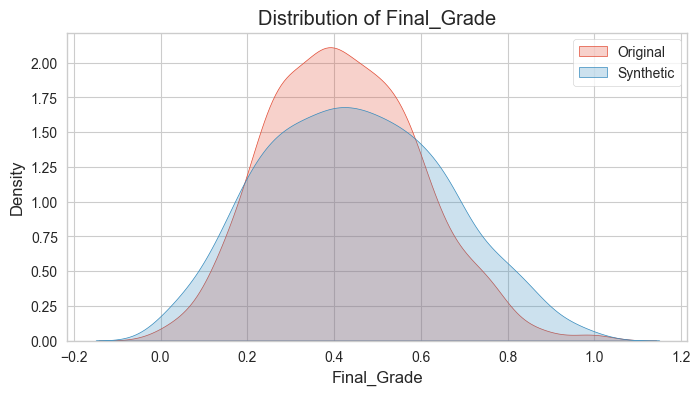

C:\Users\ChiliCheeze\AppData\Local\Temp\ipykernel_4128\291449245.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(concat_data_updated[col], label='Original', shade=True)
C:\Users\ChiliCheeze\AppData\Local\Temp\ipykernel_4128\291449245.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[col], label='Synthetic', shade=True)


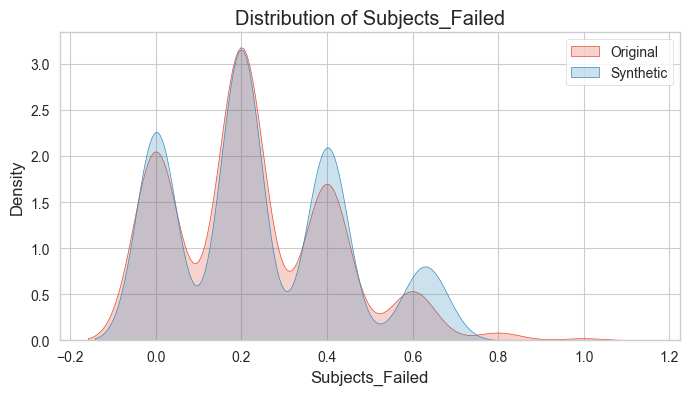

C:\Users\ChiliCheeze\AppData\Local\Temp\ipykernel_4128\291449245.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(concat_data_updated[col], label='Original', shade=True)
C:\Users\ChiliCheeze\AppData\Local\Temp\ipykernel_4128\291449245.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[col], label='Synthetic', shade=True)


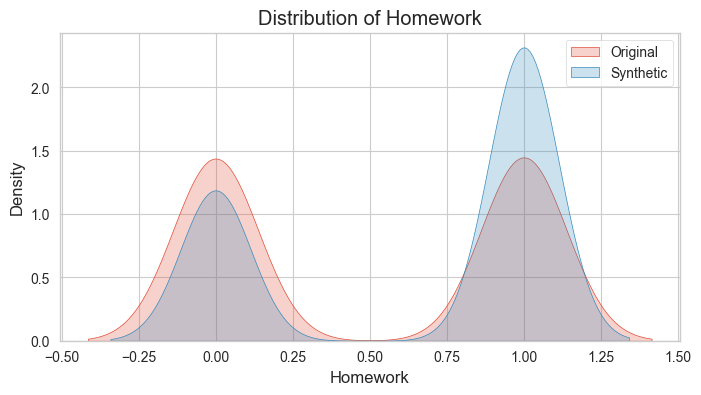

In [46]:
#Visualization for the distribution of numerical features between the original and synthetic datasets.
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['Final_Grade', 'Subjects_Failed', 'Homework']

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(concat_data_updated[col], label='Original', shade=True)
    sns.kdeplot(synthetic_data[col], label='Synthetic', shade=True)
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()

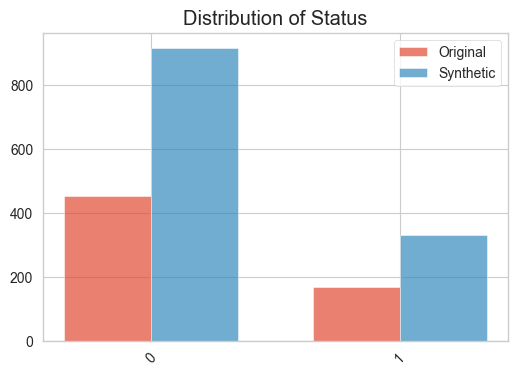

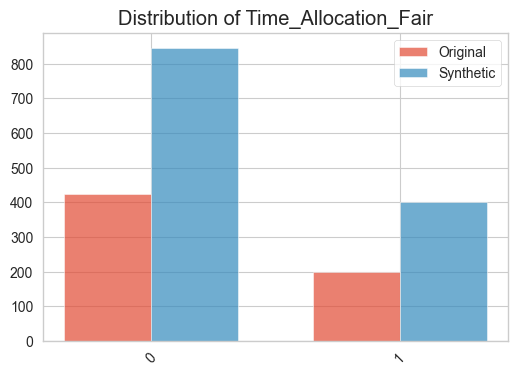

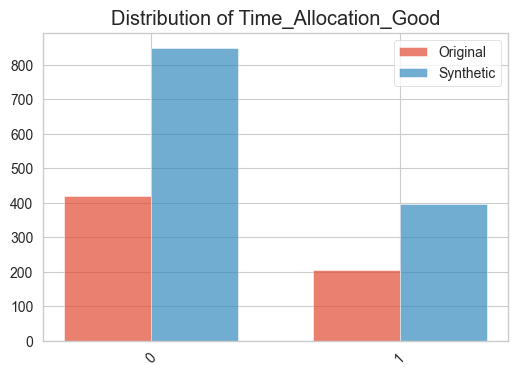

In [47]:
#Visualization for the distribution of categorical features between the original and synthetic datasets.
categorical_columns = ['Status', 'Time_Allocation_Fair', 'Time_Allocation_Good']

for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    original_counts = concat_data_updated[col].value_counts()
    synthetic_counts = synthetic_data[col].value_counts()

    bar_width = 0.35
    index = range(len(original_counts))

    plt.bar(index, original_counts.values, bar_width, label='Original', alpha=0.7)
    plt.bar([i + bar_width for i in index], synthetic_counts.values, bar_width, label='Synthetic', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xticks([i + bar_width / 2 for i in index], original_counts.index, rotation=45)
    plt.legend()
    plt.show()


In [48]:
# Summary statistics comparison
print("Original Data Statistics:")
print(concat_data_updated.describe())

print("\nSynthetic Data Statistics:")
print(synthetic_data.describe())


Original Data Statistics:
             Year  Final_Grade  Subjects_Failed    Homework  \
count  624.000000   624.000000       624.000000  624.000000   
mean     2.597756     0.422591         0.228205    0.501603   
std      1.120391     0.172432         0.190899    0.500399   
min      1.000000     0.000000         0.000000    0.000000   
25%      2.000000     0.288390         0.000000    0.000000   
50%      3.000000     0.411985         0.200000    1.000000   
75%      4.000000     0.543071         0.400000    1.000000   
max      4.000000     1.000000         1.000000    1.000000   

       Reading_and_Note_Taking  Examination  Teachers_Consultation  \
count                624.00000   624.000000             624.000000   
mean                   0.50641     0.526991               0.469551   
std                    0.50036     0.301409               0.499472   
min                    0.00000     0.000000               0.000000   
25%                    0.00000     0.263158             

In [49]:
import pandas as pd

#Combining the original and synthetic data 
combined_data = pd.concat([concat_data_updated, synthetic_data], ignore_index=True)

In [50]:
from sklearn.utils import shuffle

# Shuffle the combined dataset to ensure it doesn’t have patterns based on the original vs. synthetic data split.
combined_data = shuffle(combined_data, random_state=42)


Independent variables are the predictor or the features that will help us predict whether the student has probability to be a irregular student for the next semester or will probably stay as regular student based on their study habits that is gathered through the survey and final grades

Dependent variable is the target variable or what we are trying to know which is the status of the student

In [51]:
# Dependent(y) and Independent(x) Variable segregation 

x = combined_data.drop(['Status'], axis=1)
y = combined_data['Status']

In [52]:
#Data Spliting (Training and Testing Set)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25)

In [53]:
y_train_df = y_train.rename("Target")

# Concatenate the feature DataFrame (x_train) with the target column (y_train_df)
columnStatus_for_correlation = pd.concat([x_train, y_train_df], axis=1)

# Calculate the correlation matrix
correlation_matrix = columnStatus_for_correlation.corr()

ValueError: could not convert string to float: 'Low'

In [50]:
correlation_matrix

,Year,Final_Grade,Subjects_Failed,Homework,Reading_and_Note_Taking,Examination,Teachers_Consultation,Time_Allocation_Fair,Time_Allocation_Good,Time_Allocation_Poor,Study_Period_Procedures_Flashcards,Study_Period_Procedures_Group Discussions,Study_Period_Procedures_Pomodoro,Study_Period_Procedures_Summarizing,Target
Year,1.000000,0.062719,0.051920,-0.039889,-0.065347,-0.125908,0.120916,0.171743,-0.093281,-0.089598,-0.169130,0.058968,0.112129,-0.003660,-0.101897
Final_Grade,0.062719,1.000000,0.733590,-0.044829,-0.139651,-0.104492,0.050477,0.123341,-0.088648,-0.026170,-0.070132,-0.099514,0.044511,0.111606,-0.610847
Subjects_Failed,0.051920,0.733590,1.000000,-0.045494,-0.114266,-0.074963,-0.020167,0.048122,-0.004846,-0.031936,-0.043829,-0.034469,0.056674,0.011020,-0.751146
Homework,-0.039889,-0.044829,-0.045494,1.000000,-0.057916,0.047031,-0.121904,0.000866,-0.056988,0.047102,0.120239,0.099567,-0.005272,-0.206057,0.066877
Reading_and_Note_Taking,-0.065347,-0.139651,-0.114266,-0.057916,1.000000,0.144458,0.018169,-0.078222,0.132919,-0.066344,0.034013,-0.054759,0.076263,-0.048452,0.102623
Examination,-0.125908,-0.104492,-0.074963,0.047031,0.144458,1.000000,-0.014436,-0.172726,0.207402,-0.040780,0.054584,-0.028836,-0.047633,0.034161,0.093937
Teachers_Consultation,0.120916,0.050477,-0.020167,-0.121904,0.018169,-0.014436,1.000000,0.167619,-0.050038,-0.108536,0.027930,-0.142407,0.020586,0.090920,-0.023143
Time_Allocation_Fair,0.171743,0.123341,0.048122,0.000866,-0.078222,-0.172726,0.167619,1.000000,-0.476479,-0.461436,0.027158,0.082484,-0.036782,-0.064332,-0.145981
Time_Allocation_Good,-0.093281,-0.088648,-0.004846,-0.056988,0.132919,0.207402,-0.050038,-0.476479,1.000000,-0.504122,0.094086,-0.070601,-0.031419,0.004995,0.053495
Time_Allocation_Poor,-0.089598,-0.026170,-0.031936,0.047102,-0.066344,-0.040780,-0.108536,-0.461436,-0.504122,1.000000,-0.115351,-0.007621,0.052016,0.062237,0.082071


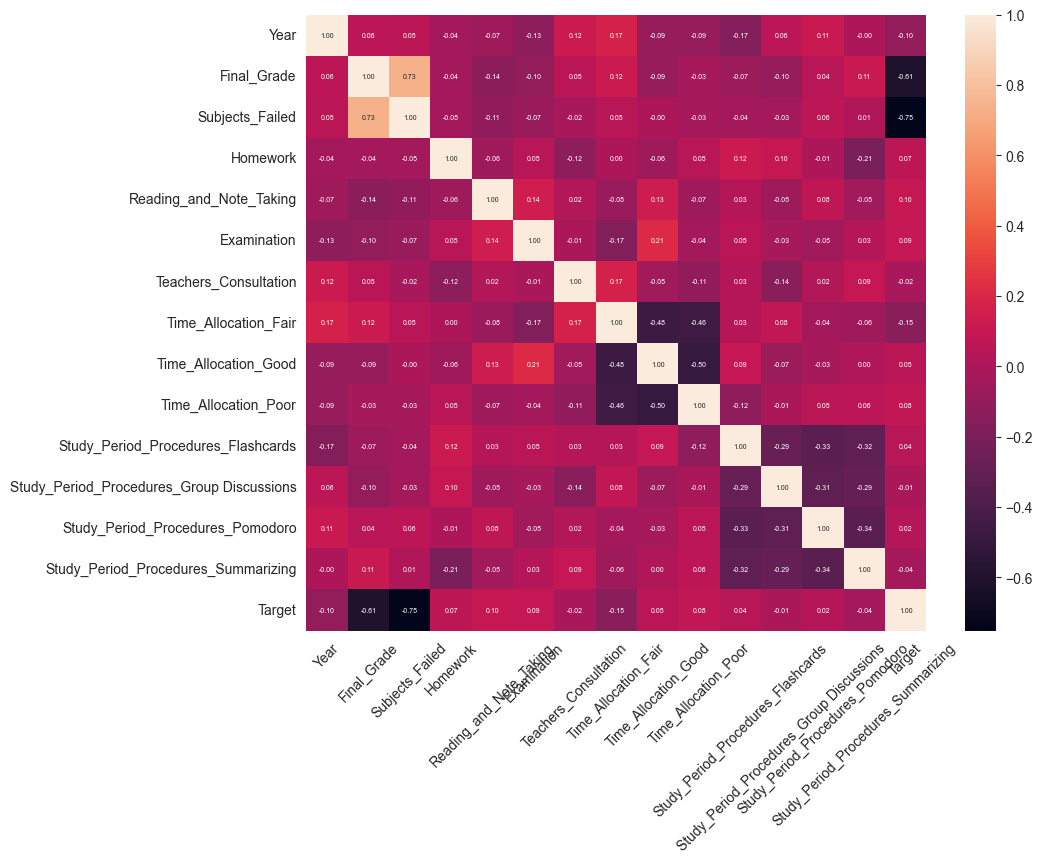

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', annot_kws={"size": 5})
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.yticks(rotation=0)   # Rotate y-axis labels
plt.show()

TRAINING RANDOM FOREST 

In [52]:
param_grid = {
    'n_estimators': [100, 150, 200],          
    'bootstrap': [True, False],              
    'max_depth': [8, 10, 12],               
    'min_samples_split': [8, 10, 12],        
    'class_weight': [
        {0: 1, 1: 5}, 
        {0: 1, 1: 8}, 
        {0: 1, 1: 10}, 
        'balanced'
    ],  
}

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the model
rf_model = RandomForestClassifier(random_state=25)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='f1',        
    cv=5,                
    verbose=2,          
    n_jobs=-1            
)

# Fit the model on training data
grid_search.fit(x_train, y_train)

# Display best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'class_weight': {0: 1, 1: 5}, 'max_depth': 8, 'min_samples_split': 8, 'n_estimators': 100}
Best F1 Score: 0.9847133757961783


In [53]:
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import ADASYN

rf_model = RandomForestClassifier(
    n_estimators=500,
    bootstrap=True,
    max_depth=6, 
    min_samples_split=10,
    min_samples_leaf= 15,
    class_weight={0: 0.692, 1: 10},
    random_state=25
)

pipeline_rf = ImbPipeline([
    ('scaler', StandardScaler()),
    ('Class Imbalance', SMOTE(random_state=25)),
    ('feature_selection', SelectKBest(score_func=f_classif, k=5)),
    ('classifier', rf_model)
])

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=25)

cv_scores = cross_val_score(pipeline_rf, x_train, y_train, cv=kf, scoring='f1')

print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', np.mean(cv_scores))
print('Standard deviation of cross-validation score:', np.std(cv_scores))

Cross-validation scores: [0.95121951 1.         0.98765432 1.         0.98734177 0.97435897
 0.98734177 0.98701299 0.98701299 0.97368421]
Mean cross-validation score: 0.9835626536397838
Standard deviation of cross-validation score: 0.013556760954616647


In [54]:
pipeline_rf.fit(x_train, y_train)

y_pred_rf = pipeline_rf.predict(x_test)

test_accuracy = accuracy_score(y_test, y_pred_rf)
print('Test Accuracy:', test_accuracy)

print('Classification Report on Test Set:')
print(classification_report(y_test, y_pred_rf))


Test Accuracy: 0.9804270462633452
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       393
           1       0.96      0.98      0.97       169

    accuracy                           0.98       562
   macro avg       0.97      0.98      0.98       562
weighted avg       0.98      0.98      0.98       562



In [58]:
import nbformat
from nbconvert import PythonExporter

# Load the notebook file
with open('RANDOM FOREST_GANS_25 convert copy 4.ipynb') as f:
    notebook_content = nbformat.read(f, as_version=4)

# Convert to Python script
exporter = PythonExporter()
python_script, _ = exporter.from_notebook_node(notebook_content)

# Save the Python script to a .py file
with open('RANDOM FOREST_GANS_25 convert.py', 'w') as f:
    f.write(python_script)


In [59]:
import pickle

with open('RANDOM FOREST_GANS_25 convert.pkl', 'wb') as f:
    pickle.dump(pipeline_rf, f)